In [1]:
# 基本のライブラリを読み込む
import numpy as np
import pandas as pd
from scipy import stats

# グラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline

# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import sys,os
sys.path.append(os.pardir)
from DataReader import DataReader
dr = DataReader()
train_df, test_df = dr.get_raw_data()

In [2]:
train_df.head()

,datetime,y,client,close,price_am,price_pm
0,2010-07-01,17,0,0,-1,-1
1,2010-07-02,18,0,0,-1,-1
2,2010-07-03,20,0,0,-1,-1
3,2010-07-04,20,0,0,-1,-1
4,2010-07-05,14,0,0,-1,-1


In [3]:
y1 = pd.read_csv("/Users/tatsukikoga/Downloads/submission_neural_.csv", header=None)
y2 = pd.read_csv("/Users/tatsukikoga/Downloads/submission_over_.csv", header=None)
y3 = pd.read_csv("../data/submission.csv", header=None)
y1 = pd.DataFrame(y1.as_matrix(), columns=['datetime', 'y1'])
y2 = pd.DataFrame(y2.as_matrix(), columns=['datetime', 'y2'])
y3 = pd.DataFrame(y3.as_matrix(), columns=['datetime', 'y3'])

In [4]:
concat_df = pd.concat([test_df, y1.y1, y2.y2, y3.y3], axis=1)
concat_df["datetime"] = pd.to_datetime(concat_df.datetime)
concat_df.head()

,datetime,client,close,price_am,price_pm,y1,y2,y3
0,2016-04-01,1,0,3,2,75.9976,62.8191,82.1716
1,2016-04-02,0,0,5,5,57.8245,78.4603,86.8021
2,2016-04-03,1,0,2,2,69.1942,78.0335,79.1832
3,2016-04-04,1,0,1,1,67.4436,71.8106,68.8649
4,2016-04-05,0,0,1,1,58.7721,65.7149,60.5866


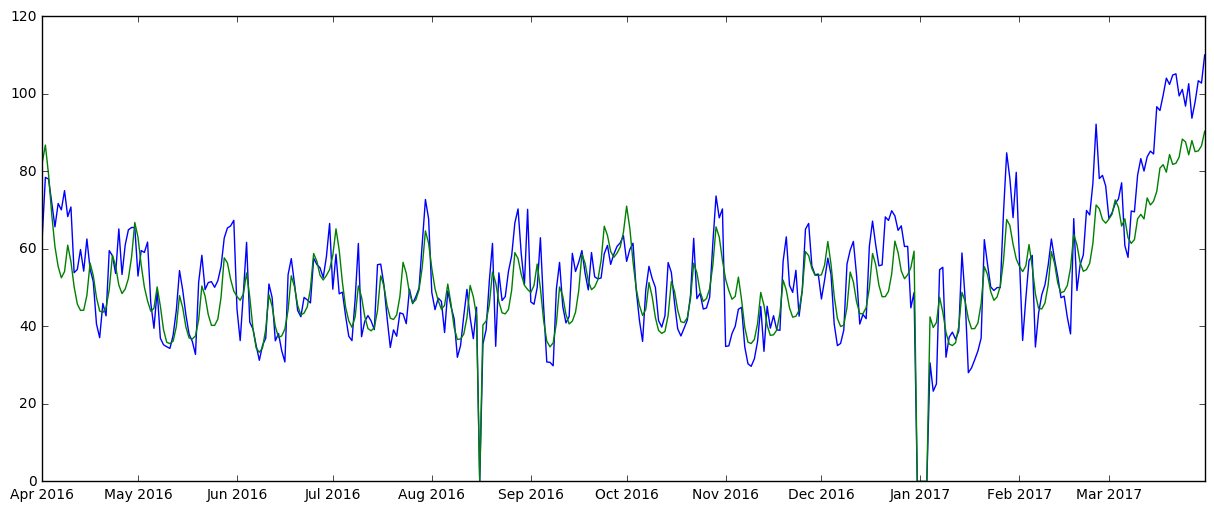

In [7]:
# plt.plot(concat_df.datetime, concat_df.y1, color='r') # neural
plt.plot(concat_df.datetime, concat_df.y2, color='b') # over
plt.plot(concat_df.datetime, concat_df.y3, color='g') # timeseries

In [6]:
concat_df["y"] = (concat_df.y1 + concat_df.y2 + concat_df.y3) / 3

In [34]:
# from DataWriter import DataWriter
# dw = DataWriter()
# dw.write_csv(concat_df)

../data/submission_20171016120020.csvがdataフォルダに追加されました


In [8]:
from stacked_generalization.lib.stacking import StackedClassifier

ImportError: No module named 'stacked_generalization'